In [2]:
!python --version


Python 3.11.9


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train,y_train) ,(x_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
len(x_train)
len(x_test)
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [10]:
x_test_flatten.shape

(10000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=( 784,),activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics =['accuracy']
)
model.fit(x_train_flatten,y_train,epochs=5)

d:\VSCODE\Demo\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 775us/step - accuracy: 0.8144 - loss: 0.7159
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.9112 - loss: 0.3159
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9217 - loss: 0.2843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9237 - loss: 0.2697
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9268 - loss: 0.2656


In [12]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9151 - loss: 0.3003


[0.2646552324295044, 0.9259999990463257]

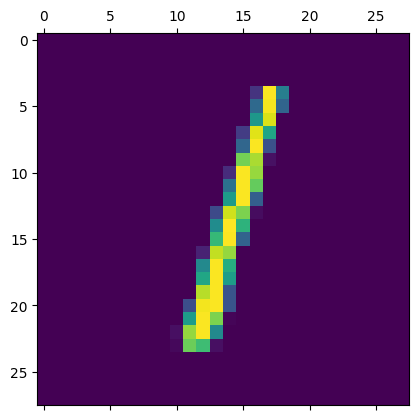

In [13]:
plt.matshow(x_test[2])

In [14]:
y_predict = model.predict(x_test_flatten)
y_predict[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


array([3.1711950e-04, 9.9147779e-01, 5.9689796e-01, 2.8452978e-01,
       2.3877846e-02, 8.8093966e-02, 1.3674523e-01, 1.2162878e-01,
       3.0672598e-01, 4.1502465e-02], dtype=float32)

In [18]:
np.argmax(y_predict[2])

np.int64(1)

In [19]:
pr_label =[ np.argmax(i) for i in y_predict]

In [20]:
conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=pr_label)
conf_mat


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   9,    9,  924,   20,    7,    2,   13,    9,   35,    4],
       [   3,    0,   17,  927,    0,   24,    2,   10,   18,    9],
       [   1,    2,    4,    1,  917,    0,   11,    4,    9,   33],
       [  11,    3,    1,   35,   11,  764,   18,    7,   35,    7],
       [  13,    3,    3,    1,    7,    9,  918,    2,    2,    0],
       [   1,    6,   23,    8,    7,    0,    0,  942,    3,   38],
       [   8,   11,    6,   27,    9,   23,    9,   10,  862,    9],
       [  11,    7,    1,   10,   27,    5,    0,   15,    5,  928]],
      dtype=int32)>

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=( 784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics =['accuracy']
)
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8747 - loss: 0.4562
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9603 - loss: 0.1380
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9722 - loss: 0.0912
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9804 - loss: 0.0657
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9840 - loss: 0.0525


In [22]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9700 - loss: 0.0983


[0.08413474261760712, 0.9736999869346619]